In [ ]:
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended


In [ ]:
import numpy as np
import random
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import bernoulli as bern, cauchy, norm, gamma, poisson as pois, binom, uniform, laplace, expon, trim_mean, iqr, beta, chi2_contingency, kstwobign, kstest, t
from scipy.stats import anderson, shapiro, normaltest, weibull_min, geom, nbinom
import statistics
import scipy.stats as sts
from tqdm import tqdm
from matplotlib import rc
from math import pi, log, tan, sin, exp, sqrt
from scipy.optimize import minimize
import scipy.special
import statsmodels.api as sm
import pandas as pd
import time

1. Пусть $X_t$ – марковский процесс с непрерывным временем, м.п.и. которого имеет вид\
$Q =
\begin{pmatrix}
-4 & 1 & 3 \\
2 & -3 & 1 \\
3 & 2 & -5
\end{pmatrix}.
$\
Найти м.в.п. вложенной цепи, моделировать $X_t$ с помощью вложенной цепи.


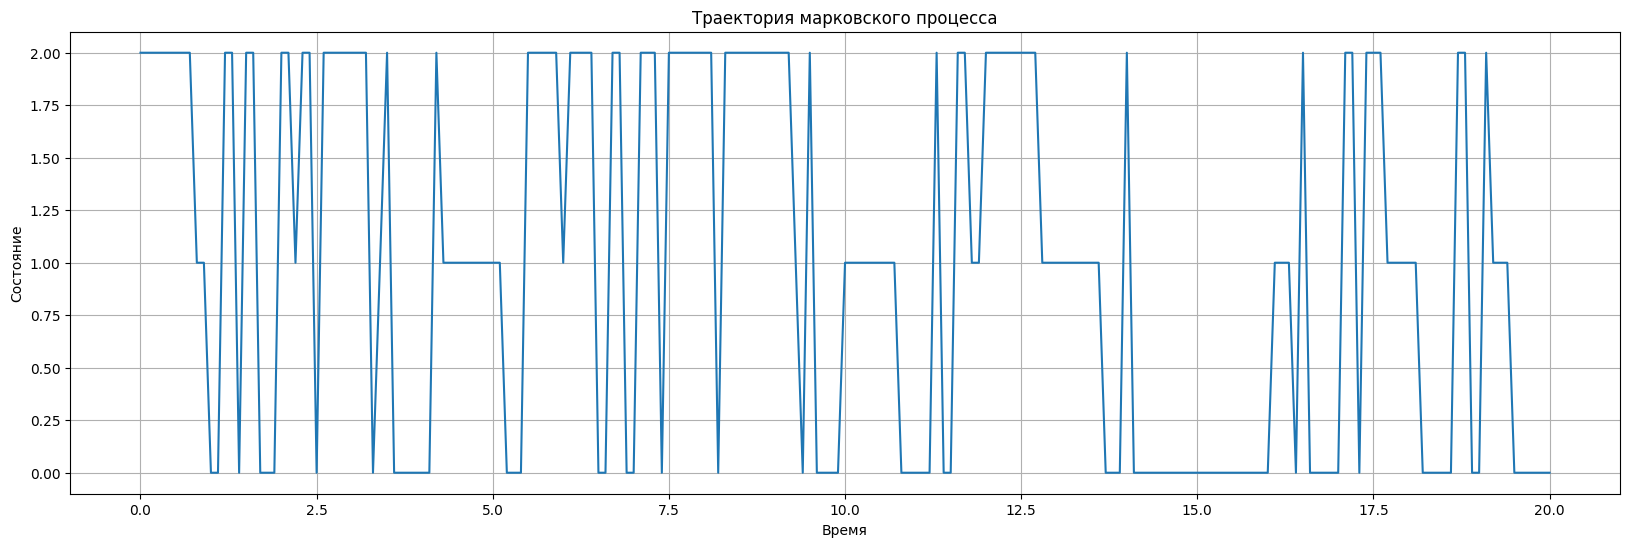

In [ ]:
Q = np.array([[-4, 1, 3],
              [2, -3, 1],
              [3, 2, -5]])

P = np.array([[0, 1/4, 3/4],
              [2/3, 0, 1/3],
              [3/5, 2/5, 0]])

# Начальное состояние
initial_state = 0

# Количество шагов моделирования
num_steps = 30

# Моделирование процесса
n = 100
time_t = [0]
states = []
state = 0

for i in range(n):
    curr = np.random.choice([0, 1, 2], p=P[state])
    states.append(curr)
    if curr == 0:
        t = expon.rvs(scale=1/4)
        time_t.append(t + time_t[i])
    elif curr == 1:
        t = expon.rvs(scale=1/3)
        time_t.append(t + time_t[i])
    elif curr == 2:
        t = expon.rvs(scale=1/5)
        time_t.append(t + time_t[i])
    state = curr

# Построение траектории процесса
plt.figure(figsize=(20, 6))
x = np.arange(0, 20.1, 0.1)
y = np.piecewise(x, [((time_t[i] <= x) & (x < time_t[i+1])) for i in range(len(states))], states)
plt.plot(x, y)
plt.xlabel('Время')
plt.ylabel('Состояние')
plt.title('Траектория марковского процесса')
plt.grid(True)
plt.show()

2. Пусть $X_t$ – марковский процесс с интенсивностью перехода $i^2$ из состояния i в i+1. Моделировать процесс и построить его траекторию.

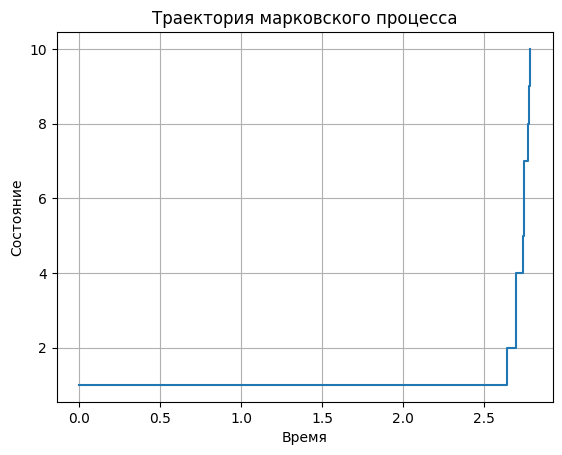

In [ ]:
def get_trajectory(size):
    state = 1
    prev = state
    trajectory = [state]
    time_t = []
    while size > 1:
        state = prev
        time_t.append(expon.rvs(scale=1/(state ** 2)))
        curr = state + 1
        trajectory.append(curr)
        prev = curr
        size -= 1
    time_t = np.cumsum(time_t)
    bins = np.insert(time_t, 0, 0)
    return bins, trajectory

bins, trajectory = get_trajectory(10)
plt.step(bins, trajectory, where='post')
plt.xlabel('Время')
plt.ylabel('Состояние')
plt.title('Траектория марковского процесса')
plt.grid(True)
plt.show()

3. В парикмахерскую с тремя парикмахерами приходят клиенты с интенсивностью λ, парикмахеры обслуживают клиентов с интенсивностью μ. Если все парикмахеры заняты, то клиент садится в очередь.

Моделировать процесс при а) λ = 1, μ = 1, б) λ = 4, μ = 1.


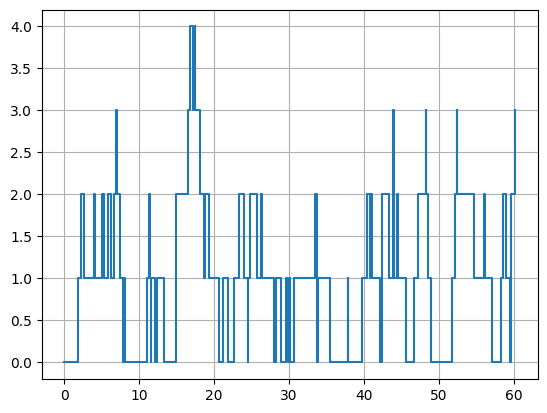

In [ ]:
l = 1
m = 1

def get_trajectory(size):
    state = 0
    prev = state
    trajectory = [state]
    time_t = []
    while size > 1:
        state = prev
        if state == 0:
            time_t.append(expon.rvs(scale=1))
            curr = 1
        elif state == 1:
            time_t.append(expon.rvs(scale=1/2))
            curr = np.random.choice([0, 2], p=[1/2, 1/2])
        elif state == 2:
            time_t.append(expon.rvs(scale=1/3))
            curr = np.random.choice([1, 3], p=[2/3, 1/3])
        elif state >= 3:
            time_t.append(expon.rvs(scale=1/4))
            curr = np.random.choice([state - 1, state + 1], p=[3/4, 1/4])
        trajectory.append(curr)
        prev = curr
        size -= 1
    time_t = np.cumsum(time_t)
    bins = np.insert(time_t, 0, 0)
    return bins, trajectory

bins, trajectory = get_trajectory(100)
plt.step(bins, trajectory, where='post')
plt.grid(True)
plt.show()

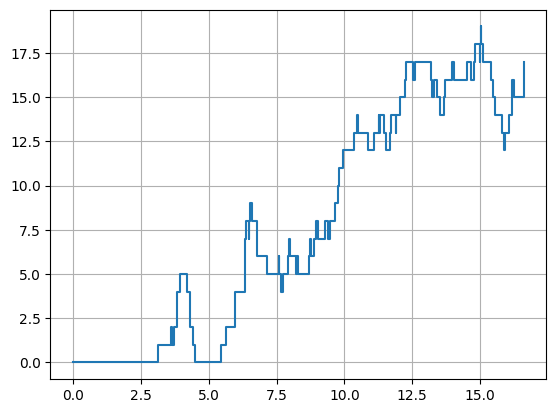

In [ ]:
l = 4
m = 1

def get_trajectory(size):
    state = 0
    prev = state
    trajectory = [state]
    time_t = []
    while size > 1:
        state = prev
        if state == 0:
            time_t.append(expon.rvs(scale=1))
            curr = 1
        elif state == 1:
            time_t.append(expon.rvs(scale=1/5))
            curr = np.random.choice([0, 2], p=[1/5, 4/5])
        elif state == 2:
            time_t.append(expon.rvs(scale=1/6))
            curr = np.random.choice([1, 3], p=[2/6, 4/6])
        elif state >= 3:
            time_t.append(expon.rvs(scale=1/7))
            curr = np.random.choice([state - 1, state + 1], p=[3/7, 4/7])
        trajectory.append(curr)
        prev = curr
        size -= 1
    time_t = np.cumsum(time_t)
    bins = np.insert(time_t, 0, 0)
    return bins, trajectory

bins, trajectory = get_trajectory(100)
plt.step(bins, trajectory, where='post')
plt.grid(True)
plt.show()

4. Моделировать марковский процесс Xt

$Q =
\begin{pmatrix}
−5 & 1 & 3 & 1\\
1 & −3 & 1 & 1\\
3 & 1 & −5 & 1\\
1 & 1 & 1 & −3\\
\end{pmatrix}
$

Найдем стационарное распределение Q и сравним его со стационарными распределениями двух марковских цепей а) вложенной цепи.

Для оценки стационарного распределения марковских цепей будем считать долю времени, проведенного
цепью в каждом из состояний за длительное время.

In [ ]:
Q = np.array([[-5, 1, 3, 1],
              [1, -3, 1, 1],
              [3, 1, -5, 1],
              [1, 1, 1, -3]])

P = np.array([[0, 1/5, 3/5, 1/5],
              [1/3, 0, 1/3, 1/3],
              [3/5, 1/5, 0, 1/5],
              [1/3, 1/3, 1/3, 0]])

In [ ]:
values, vectors = np.linalg.eig(P.T)
idx = np.argmin(np.abs(values - 1))
pi = np.abs(vectors[:, idx])
pi /= pi.sum()
print('Стационарное распределение вложенной цепи:', pi)

values, vectors = np.linalg.eig(Q.T)
idx = np.argmin(np.abs(values))
pi = np.abs(vectors[:, idx])
pi /= pi.sum()
print('Стационарное распределение Q:', pi)

# Эмпирическое распределение
n = 1000
total_time = [0] * 4
time_t = [0]
states = []
state = 0

for i in range(n):
    curr = np.random.choice([0, 1, 2, 3], p=P[state])
    states.append(curr)
    if curr == 0:
        t = expon.rvs(scale=1/5)
        total_time[0] += t
        time_t.append(t + time_t[i])
    elif curr == 1:
        t = expon.rvs(scale=1/3)
        total_time[1] += t
        time_t.append(t + time_t[i])
    elif curr == 2:
        t = expon.rvs(scale=1/5)
        total_time[2] += t
        time_t.append(t + time_t[i])
    else:
        t = expon.rvs(scale=1/3)
        total_time[3] += t
        time_t.append(t + time_t[i])
    state = curr

time_t.pop(0)

S = sum(total_time)
total_time /= S
print('Эмпирическое распределение: ', total_time)



Стационарное распределение вложенной цепи: [0.3125 0.1875 0.3125 0.1875]
Стационарное распределение Q: [0.25 0.25 0.25 0.25]
Эмпирическое распределение:  [0.24946513 0.25456486 0.22762318 0.26834683]
